[[ 0.  2. 52.  7. 66.]
 [ 2.  0.  7. 66. 46.]
 [52.  7.  0. 77. 64.]
 [ 7. 66. 77.  0.  0.]
 [66. 46. 64.  0.  0.]]
Вывод кратчайшего пути в графе
[[-1.  1.  1.  1.  1.]
 [ 1. -1.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.]
 [ 1.  0.  0. -1.  0.]
 [ 1.  0.  0.  0. -1.]]
Путь в графе с разделением на кластеры
[[-1.  1.  1.  1.  0.]
 [ 1. -1.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.]
 [ 1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]]


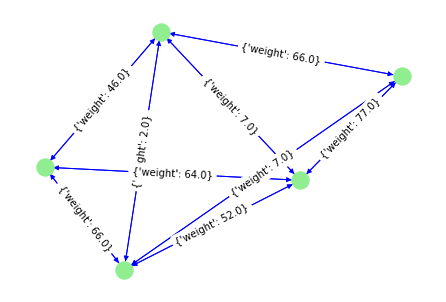

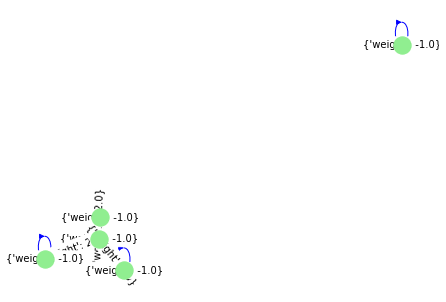

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(matrix_shortest_way, begin_matrix, n):
    G = nx.from_numpy_matrix(begin_matrix, create_using=nx.DiGraph)
    layout = nx.spring_layout(G)
    nx.draw(G, layout, node_color='lightgreen', edge_color='b')
    nx.draw_networkx_edge_labels(G, pos=layout)
    plt.show()

    result_graph = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if matrix_shortest_way[i][j] != -1:
                result_graph[i][j] = matrix_shortest_way[i][j] * begin_matrix[i][j]
            else:
                result_graph[i][j] = -1

    G = nx.from_numpy_matrix(result_graph, create_using=nx.DiGraph)
    layout = nx.spring_layout(G)
    nx.draw(G, layout, node_color='lightgreen', edge_color='b')
    nx.draw_networkx_edge_labels(G, pos=layout)
    plt.show()

def make_begin_edge(matrix_shortest_way):
    minim = begin_matrix[0][1]
    i_min, j_min = 0, 1
    for i in range(n):
        for j in range(i + 1, n):
            if minim > begin_matrix[i][j] and begin_matrix[i][j] != 0:
                minim = begin_matrix[i][j]
                i_min, j_min = i, j
    matrix_shortest_way[i_min][j_min] = matrix_shortest_way[j_min][i_min] = 1
    matrix_shortest_way[i_min][i_min] = matrix_shortest_way[j_min][j_min] = -1
    return matrix_shortest_way

def make_other_edges(matrix_shortest_way):
    minim = None
    i_min, j_min = 0, 1
    for i in range(n):
        if matrix_shortest_way[i][i] == -1:
            for j in range(n):
                if matrix_shortest_way[j][j] == 0:
                    if minim is None or (minim > matrix_shortest_way[i][j] and begin_matrix[i][j] != 0):
                        minim = matrix_shortest_way[i][j]
                        i_min, j_min = i, j
    matrix_shortest_way[i_min][j_min] = matrix_shortest_way[j_min][i_min] = 1
    matrix_shortest_way[i_min][i_min] = matrix_shortest_way[j_min][j_min] = -1
    return matrix_shortest_way

def divide_into_clusters(matrix_shortest_way):
    maxim = 0
    i_max, j_max = -1, -1
    for i in range(n):
        for j in range(i + 1, n):
            if matrix_shortest_way[i][j] == 1:
                if begin_matrix[i][j] > maxim:
                    maxim = begin_matrix[i][j]
                    i_max, j_max = i, j
    matrix_shortest_way[i_max][j_max] = 0
    matrix_shortest_way[j_max][i_max] = 0
    return matrix_shortest_way

def knp(matrix, n, k):
    matrix_shortest_way = np.zeros((n, n))
    matrix_shortest_way = make_begin_edge(matrix_shortest_way)
    for i in range(n - 2):
        matrix_shortest_way = make_other_edges(matrix_shortest_way)

    print("Вывод кратчайшего пути в графе")
    print(matrix_shortest_way)


    for i in range(k - 1):
        matrix_shortest_way = divide_into_clusters(matrix_shortest_way)

    print("Путь в графе с разделением на кластеры")
    print(matrix_shortest_way)

    draw_graph(matrix_shortest_way, matrix, n)


if __name__ == '__main__':
    n, k = 5, 2
    begin_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
          if i == 3:
            begin_matrix[i][j] = begin_matrix[j][i] = 0
          else:
            begin_matrix[i][j] = begin_matrix[j][i] = np.random.randint(1, 100)
    print(begin_matrix)

    knp(begin_matrix, n, k)